# Project: Wrangling and Analyze Data

# Data: Tweet archive WeRateDogs

# Name:  Anita Akelo

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assesing">Assesing Data </a></li>
<li><a href="#cleaning">Cleaning Data </a></li>
<li><a href="#store">Storing Data </a></li>
<li><a href="#eda">Analyzing and Visualizing Data </a></li>
<li><a href="#insights">Insights </a></li>
<li><a href="#conc">Conclusion </a></li>
<li><a href="#limits">Limitations </a></li>
<li><a href="#referrence">References </a></li>
 <ul>   
    

<a id='intro'></a>
## Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In this project I will be:
- Gathering data
- Assesing data
- Cleaning data
- Storing data
- Analyzing and visualizing data
- reporting on my wrangling and visualization efforts

In [1]:
import requests
import pandas as pd
import numpy as np
import json, re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive= pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [4]:
image = pd.read_csv('image-predictions.tsv',sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
twitter_api = []
with open ('tweet-json.txt') as data:
    for line in data:
        tweet = json.loads(line)
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        twitter_api.append({'tweet_id' : tweet_id,
                         'retweet_count' : retweet_count,
                         'favorite_count':favorite_count})
twitter_api = pd.DataFrame(twitter_api)

<a id='assesing'></a>
## Assessing Data


**we will start with assesing the twitter-archive-enhanced data**

In [6]:
archive.shape

(2356, 17)

In [7]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
sum(archive.text.duplicated())

0

**Observation**

 - The variables under the dog_stage: doggo, floofer, pupper and puppo are represented as various variable while they should be present as a single variable.According to the tidiness rule each observation must be a row.

- There are some 'None' objects present in "doggo", "floofer", "pupper" and "puppo" which should be 'NaN'.

 
 
                                                          
 

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Observation**
- Erroneous datatype (timestamp and tweet_id)

tweet_id is formated as int64 which means when we perform a descriptive analysis on the data the twitter_id will be include which should not be the case.

timestamp should be of the datatype datetime



- The columns 'in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'have many NA values 


-  We need to filter the data for only tweets.


- some entries have missing 'expanded_urls'

In [10]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The maximum value in the rating_denominator and rating_numerator are quite large and far from the values considered to be usual. That is for numerator a value  always greater than 10 and for the denominator a value of 10.

In [11]:
archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [12]:
archive.value_counts(archive.rating_denominator)

rating_denominator
10     2333
50        3
11        3
80        2
20        2
150       1
130       1
120       1
110       1
90        1
0         1
70        1
2         1
40        1
16        1
15        1
7         1
170       1
dtype: int64

There are rating_denominator that are not 10.

There is a row with 0 denominator. This may be a scrapping error 


In [13]:
pd.set_option('display.max_colwidth', None)
print(archive.query("rating_denominator == 0").text)

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


There are two numbers in this tweet, “960/00” and “13/10” the right rating in this case is 13/10.

Some rating numerator and denominator values  are invalid when the tweet contains two ratings.

In [14]:
count = 0
for i in archive['rating_denominator']:
    if i != 10 :
        count += 1
        
print('The number of Denominator values not equal to 10 is {}.'.format(count))

The number of Denominator values not equal to 10 is 23.


 we have it that almost always the ratings have a rating_denominator of 10. Our dataset does not comply to this as there are 23 entries that have the denominator not equal to 10.
 

In [15]:
archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [16]:
archive.value_counts(archive.rating_numerator)

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
420       2
75        2
0         2
15        2
666       1
960       1
204       1
182       1
165       1
144       1
143       1
88        1
121       1
99        1
27        1
84        1
80        1
60        1
50        1
45        1
44        1
26        1
24        1
20        1
17        1
1776      1
dtype: int64

we can see that there are values that are less than 10.

In [17]:
count = 0
for i in archive['rating_numerator']:
    if i <= 9:
        count += 1
            
print('The number of Numerator values less than 10 is {}.'.format(count))

The number of Numerator values less than 10 is 440.


A total of 440 entries have a  numerator value less than 10

In [18]:
pd.set_option('display.max_colwidth', None)
print(archive.query("rating_numerator == 0").text)


315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


The entry 1016 shows that the tweet contains pictures that don’t contain any dogs.

Some rating numerator and denominator values are invalid when the tweet contains a picture that does not contain any dog.

In [19]:
pd.set_option('display.max_colwidth', None)
print(archive.query("rating_numerator <= 9").text)

45                                This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
229     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315                                                      When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
387                                                                                                  I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
462                           RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
                                                                                       ...                                                       

text[45] have the rating as a decimal so it may also be the case that the rating_numeratpr extracted was 5 instead of 13.5

In [20]:
archive.text.sample()

2197    This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI
Name: text, dtype: object

In [21]:
archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

The name column contains wrong names like 'None'and 'a' that should be removed. The name 'a' could be a stop_word

In [22]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- The source contains html residue which is information that is not required. 

This is data quality issue that we can even observe in the output ofthe code 'archive.head()'

In [23]:
archive.text.sample(5)

1429                           Here's a pupper with a piece of pizza. Two of everybody's favorite things in one photo. 11/10 https://t.co/5USjFjKI7Z
869     Guys.. we only rate dogs. Pls don't send any more pics of the Loch Ness Monster. Only send in dogs. Thank you. 11/10 https://t.co/obH5vMbm1j
1449                    This poor pupper has been stuck in a vortex since last week. Please keep her in your thoughts. 10/10 https://t.co/7ODQWHwYDx
613                                 This is Tyr. He's just checking on you. Nifty af tongue slip. 12/10 would absolutely pet https://t.co/Jgnuiyvq06
1212      This is Oscar. He's a world renowned snowball inspector. It's a ruff job but someone has to do it. 10/10 great guy https://t.co/vSufMAKm3C
Name: text, dtype: object

The Tweet's link is combined with the  text

In [24]:
archive.expanded_urls.sample(5)

349    http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1
520                                                                                                                                                                                                                                              https://twitter.com/dog_rates/status/810254108431155201/photo/1
570                                                                                                                                                                                                                                                                                                          NaN
838                                                                                  

The column"expanded_urls' have some samples with double links and they are seperated by a comma like is the case in row 1235

In [25]:
double_urls = archive.expanded_urls.str.contains(r',').sum()
print('Number of double links: ',double_urls)

Number of double links:  639


**Assesing Image Predictions data**

In [26]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- There are some inconsistency in the data. The columns 'p1', 'p2' and 'p3' have inconsistencies in the writing

- The columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' are not descriptive enough

In [27]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Erraneous datatype . Tweet_id datatype is not correct
- this dataset has only 2075 tweets which is a value less than the number of tweets in  tweeter_archive data that has 2356 values

In [28]:
image.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,True,Ibizan_hound,0.208172,True,Saluki,0.078975,True
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True
475,675149409102012420,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,1,chow,0.999876,True,Tibetan_mastiff,0.000059,True,Tibetan_terrier,0.000029,True


There are rows without any prediction of the dog breed as is the case in row 1240 where 'p1_dog'='p2_dog'='p3_dog'=False

In [29]:
image[["p1_dog","p2_dog","p3_dog"]].apply(lambda x:
    (x[0] == False and x[1] == False and x[2] == False) 
    , axis = 1).value_counts()

False    1751
True      324
dtype: int64

- There are 324 records without the prediction of the dog breed

In [30]:
sum(image['tweet_id'].duplicated())

0

**Assesing Twitter API data**

In [31]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


This visual assesment does not give much insight into the tidiness and quality issues that may be present in the data


In [32]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


- Erraneous datatype  for the column 'id'
- Total number of rows does not equal that of twitter_archive data as well as that of the image_predictions data

### Quality issues

**All datasets**

1.The "tweet_id' column should be of the 'string' datatype and not 'INT'.

**twitter_archive data**

2.The datatype of timestamp to datetime

3.The columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id”, “retweeted_status_user_id”, and “retweeted_status_timestamp” have lots of NA values.

4.The column 'source' contains html residues.

5.The column 'expanded _urls' have NaN values and also some rows contain  double 'expanded _urls'

6.A total of 440 entries have a Numerator value less than 10.

7.A total of 23 ratings do not have the denominator value as 10.

8.The "name" column has a total of 745 'None' strings and multiple stop word present.


**Image_predictions data**

 
9.The prediction is an uppercase and lowercase mix, also there are "_" in the breed name.

10.There are 324 records without the prediction of the dog breed


### Tidiness issues
1.The column heads 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' in `image_predictions dataset` are not informative headers.

2.The column 'text' in `twitter_archive data` has two variables ,the text and the tweet_link

3.The observations doggo, floofer, pupper and puppo in `twitter_archive data` are represented as four variables. According to the tidyness rule, observations should be part of a single column.

4.The dataframes twitter_archive_enhanced, image_predictions and twitter_api should be one table . According to the tidyness rule, single observational unit must be a table.



<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
clean_archive=archive.copy()
clean_image=image.copy()
clean_twitter_api=twitter_api.copy()

### Issue #1: Data-type of "tweet_id" is 'INT' not 'string' in all the three datasets

#### Define:
Change the datatype of tweet_id to string in the 3 dataframes (`twitter_archive_enhanced`, `image_predictions`, `twitter_api`).

#### Code

In [34]:
df_list = [clean_archive, clean_image,clean_twitter_api]

for i in df_list:
    i.tweet_id = i.tweet_id.astype(str)    

#### Test

In [35]:
clean_archive.dtypes.tweet_id

dtype('O')

In [36]:
clean_image.dtypes.tweet_id


dtype('O')

In [37]:
clean_twitter_api.dtypes.tweet_id

dtype('O')

### Issue #2: Data-type of "timestamp"  is not  'datetime'

#### Define
Change the datatype of timestamp to datetime in `twitter_archive_enhanced`.

#### Code

In [38]:
clean_archive['timestamp']= pd.to_datetime(clean_archive['timestamp'])

#### Test

In [39]:
clean_archive.dtypes.timestamp

datetime64[ns, UTC]

### Issue #3: The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and ' retweeted_status_timestamp' have many NA values

#### Define

We need to drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp after filtering them to only tweets.

Count of only tweets =tweet_id count - (in_reply_to_status_id count + retweeted_status_id)

Count of only tweets = 2356 - 259

#### Code

In [40]:
list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
        'retweeted_status_user_id', 'retweeted_status_timestamp']
for i in list:
    clean_archive = clean_archive[clean_archive[i].isnull()]
    clean_archive = clean_archive.drop([i], axis=1)
    

#### Test

In [41]:
print(len(archive)-len(clean_archive))
clean_archive.head(0)

259


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
clean_archive.shape

(2097, 12)

The dataset is reduced to only 2097 rows which is 2356-259

### Issue #4: HTML residues present in the column 'source'

#### Define

Use regex(regular expression)  to extract the source

#### Code

In [43]:
clean_archive.source = clean_archive.source.str.extract(r"(?<=>)(.*)(?=<)")

#### Test

In [44]:
clean_archive.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #5: NaN values in 'expanded _urls' and double   'expanded _urls'

#### Define

Drop the null values 

#### Code

In [45]:
clean_archive = clean_archive[clean_archive['expanded_urls'].notna()]

#### Test

In [46]:
clean_archive['expanded_urls'].isnull().sum()

0

### Issue #6: 440 'rating_numerator' values less than 10 


#### Define

In assesing data we saw that some text contain two ratings and other text have rating_numerator as decimal numbers.

Use a for loop together with regular expression to detect all the text with  decimal numbers as the rating_numerator

Print the text, numerator and the text index

Manually replace the rating numerator with the decimal value 

#### code

In [47]:

for row in clean_archive['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    result = re.search(detect,row)
    if result != None:
        Ind=clean_archive.loc[clean_archive['text']==row].index[0]
        Txt = clean_archive.text[Ind]
        Num = clean_archive.rating_numerator[Ind]
        print('Index is : ',Ind,'\n',
              'Text is : ',Txt,'\n'
              'The Numerator is : ',Num,'\n',
             )
        
      


Index is :  45 
 Text is :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
The Numerator is :  5 

Index is :  695 
 Text is :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
The Numerator is :  75 

Index is :  763 
 Text is :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
The Numerator is :  27 

Index is :  1712 
 Text is :  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 
The Numerator is :  26 



In [48]:
clean_archive.loc[clean_archive.index == 45, 'rating_numerator'] = 13.5
clean_archive.loc[clean_archive.index == 695, 'rating_numerator'] = 9.75
clean_archive.loc[clean_archive.index == 763, 'rating_numerator'] = 11.27
clean_archive.loc[clean_archive.index == 1712, 'rating_numerator'] = 11.26

#### Test

In [49]:
clean_archive.loc[763]

tweet_id                                                                                                                                                             778027034220126208
timestamp                                                                                                                                                     2016-09-20 00:24:34+00:00
source                                                                                                                                                               Twitter for iPhone
text                  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
expanded_urls                                                                                                           https://twitter.com/dog_rates/status/778027034220126208/photo/1
rating_numerator                                                                

### Issue #7: 23 'rating_denominator' values are not equal to 10

#### Define

Find the texts with two denominator ratings then manually clean by choosing a rating that comply to a denominator of 10

#### Code

In [50]:
item = clean_archive.loc[clean_archive['rating_denominator']!=10]

for i in item ['text']:
    if '/10' in i:
        print(i)
        print(item[item['text']==i].index)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64Index([1202], dtype='int64')
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Int64Index([1662], dtype='int64')
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Int64Index([2335], dtype='int64')


This returns the text with two_denominator ratings

In [51]:
 
# this manual replacement is made possible by the fact that i have the index of the rows
# this also cleans for the some numerator ratings that are less than 10 or extremely more than 10
clean_archive.loc[clean_archive.index == 1068, 'rating_numerator'] = 14
clean_archive.loc[clean_archive.index == 1165, 'rating_numerator'] = 13
clean_archive.loc[clean_archive.index == 1202, 'rating_numerator'] = 11
clean_archive.loc[clean_archive.index == 1662, 'rating_numerator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_numerator'] = 9

clean_archive.loc[clean_archive.index == 1068, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1165, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1202, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 1662, 'rating_denominator'] = 10
clean_archive.loc[clean_archive.index == 2335, 'rating_denominator'] = 10

#### Test

In [52]:
clean_archive.loc[1068]

tweet_id                                                                                                                                                                                                                                                           740373189193256964
timestamp                                                                                                                                                                                                                                                   2016-06-08 02:41:38+00:00
source                                                                                                                                                                                                                                                             Twitter for iPhone
text                                                                                                                                     After so many requests, this 

### Issue #8: 745 'None' names and some stop words in the column 'name' 

#### Define

Exract the correct dog name from text.

Sample a few text to see the pattern

#### Code

In [53]:
clean_archive.text.sample(12)

377                  Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB
1731                                              This is Willie. He's floating away and needs your assistance. Please someone help Willie. 10/10 https://t.co/MJqygWqt8X
1405                                                                                  "I'm bathing the children what do you want?"  ...both 10/10 https://t.co/Rizm1LWh4z
1323                          This is Kara. She's been trying to solve that thing for 3 days. "I don't have thumbs," she said. 11/10 solid effort https://t.co/lA6a8GefrV
2285                             Quite an advanced dog here. Impressively dressed for canine. Has weapon. About to take out trash. 10/10 good dog https://t.co/8uCMwS9CbV
1489                                                                              This is Wally. He's being abducted by aliens. 10/10 poor pupper http

- Patterns

The name always start with a capital letter followed by small letters

The name of the dog is introduced by is, meet,'s, to and named

I had to run the sampling code several times to see the unique ways the dog is being introduced

In [54]:
clean_archive['name'] = clean_archive.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

#### Test

In [55]:
clean_archive.query('name == "None"').count()[0]

0

In [56]:
clean_archive.name.value_counts()

 Lucy       11
 Charlie    11
 Oliver     11
 Cooper     10
 Penny       9
            ..
 Beya        1
 Zooey       1
 Kayla       1
 Quinn       1
 Netflix     1
Name: name, Length: 957, dtype: int64

In [57]:
clean_archive.shape

(2094, 12)

In [58]:
clean_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [59]:
archive.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog just brutally murdered a snowman. Currently toying with its nutritious remains 9/10 would totally still pet https://t.co/iKThgKnW1j,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707377100785885184/photo/1,https://twitter.com/dog_rates/status/707377100785885184/photo/1",9,10,None,None,None,None,None
1521,690690673629138944,NaN,NaN,2016-01-23 00:21:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cedrick. He's a spookster. Did me a discomfort. 10/10 would pet with a purpose https://t.co/yS7T4gxKod,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690690673629138944/photo/1,10,10,Cedrick,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866452082688/photo/1,13,10,None,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remington. He was caught off guard by the magical floating cheese. Spooked af. 10/10 deep breaths pup https://t.co/mhPSADiJmZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389455101952/photo/1,10,10,Remington,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716285507865542656/photo/1,https://twitter.com/dog_rates/status/716285507865542656/photo/1",12,10,Stephanus,None,None,None,None
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He's quite the jokester. Takes it too far sometimes. Still 11/10 would pet https://t.co/YDtZcAiMAf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/799297110730567681/photo/1,https://twitter.com/dog_rates/status/799297110730567681/photo/1",11,10,Jeffrey,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,12,10,None,None,None,None,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rumpole. He'll be your Uber driver this evening. Won't start driving until you buckle pup. 13/10 h*ckin safe good boy https://t.co/EX9Z3EXlVP,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/853299958564483072/photo/1,https://twitter.com/dog_rates/status/853299958564483072/photo/1",13,10,Rumpole,None,None,None,None
601,798665375516884993,

**CLEANING IMAGE DATA SET**

### Issue #9: A mix of uppercase and lowercase and also there are "_" in the breed name

#### Define

Change the values under the columns 'p1', 'p2' and 'p3' to be all lowercase

#### Code

In [60]:
clean_image['p1'] = clean_image['p1'].str.lower()
clean_image['p2'] = clean_image['p2'].str.lower()
clean_image['p3'] = clean_image['p3'].str.lower()

#### Test

In [61]:
clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [62]:
clean_archive.timestamp.max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

### Cleaning for tidideness

### Issue #1:column heads  'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', are not informative          

#### Define

Rename 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' to more descriptive headers

#### Code

In [63]:
clean_image = clean_image.rename(columns={'p1':'dog_1', 'p1_conf':'conf_1', 'p1_dog':'result_1', 
                                        'p2':'dog_2', 'p2_conf':'conf_2', 'p2_dog':'result_2', 
                                        'p3':'dog_3', 'p3_conf':'conf_3', 'p3_dog':'result_3'})

#### Test

In [64]:
clean_image.head(1)

,tweet_id,jpg_url,img_num,dog_1,conf_1,result_1,dog_2,conf_2,result_2,dog_3,conf_3,result_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True


In [65]:
clean_image.shape

(2075, 12)

In [66]:
clean_twitter_api.shape

(2354, 3)

### Issue #2: The text column has two variables ,the text and the tweet_link

#### Define

create a new column with the tweet_link that is extracted from the column 'text' using regex

#### Code

In [67]:
archive.text.sample(5)

1979                    Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu
1112                      This is Hermione. Her face is as old as time. Appears fluffy af tho. 11/10 pretty damn majestic https://t.co/0b41Q4DKCA
1723    This pupper is not coming inside until she catches a snowflake on her tongue. 11/10 the determination is palpable https://t.co/lvMYbmKq8H
1271                                                              This is Billy. He sensed a squirrel. 8/10 damn it Billy https://t.co/Yu0K98VZ9A
1844                              This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you
Name: text, dtype: object

The obove output can be used to show the pattern of the links

https://t.co/ is common to all the links 

we also have a mix of small letters, capital letters and numbers

In [68]:
clean_archive['tweet_link'] = clean_archive.text.str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

#### Test

In [69]:
clean_archive.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_link


### Issue #3 :The observations  doggo, floofer, pupper and puppo are represented as variables

#### Define

create a new column dog_stage with all the four dog stages('doggo', 'floofer', 'pupper', 'puppo')

Drop the 4 columns ('doggo', 'floofer', 'pupper', 'puppo')

#### Code

In [70]:
def dog_stage(row):
    # Defining a list to store the data
    stg_lst = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stg_lst.append('doggo')
    if row['floofer'] == 'floofer':
        stg_lst.append('floofer')
    if row['pupper'] == 'pupper':
        stg_lst.append('pupper')
    if row['puppo'] == 'puppo':
        stg_lst.append('puppo')
    if len(stg_lst) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stg_lst)
    return row

In [71]:
clean_archive = clean_archive.apply(dog_stage, axis=1)

In [72]:
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [73]:
list = clean_archive['stage']
for i in list:
    clean_archive = clean_archive.replace('None','')

#### Test

In [74]:
clean_archive.stage.value_counts()

                     1759
pupper                220
doggo                  72
puppo                  23
floofer                 9
doggo and pupper        9
doggo and puppo         1
doggo and floofer       1
Name: stage, dtype: int64

### Issue #4: The dataframes twitter_archive_enhanced, image_predictions and twitter_api should be in one  table

#### Define

merge the three dataframes

#### code

In [75]:
final = clean_image.merge(clean_archive, left_on='tweet_id',right_on='tweet_id',how='inner')
final = final.merge(clean_twitter_api,left_on='tweet_id',right_on='tweet_id',how='inner')

#### Test

In [76]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   jpg_url             1971 non-null   object             
 2   img_num             1971 non-null   int64              
 3   dog_1               1971 non-null   object             
 4   conf_1              1971 non-null   float64            
 5   result_1            1971 non-null   bool               
 6   dog_2               1971 non-null   object             
 7   conf_2              1971 non-null   float64            
 8   result_2            1971 non-null   bool               
 9   dog_3               1971 non-null   object             
 10  conf_3              1971 non-null   float64            
 11  result_3            1971 non-null   bool               
 12  timestamp           1971 non-null 

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
final.to_csv('twitter_archive_master.csv',index=False)

<a id='eda'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [78]:
master=final.copy()

First I wanted to explore some numerical  variables and check for any relationship

In [79]:
#Creating a dataframe with the numerical variables of interest
df=master[['retweet_count', 'favorite_count', 'img_num', 'conf_1']]

Text(0.5, 1.0, 'Correlation matrix of numerical variables')

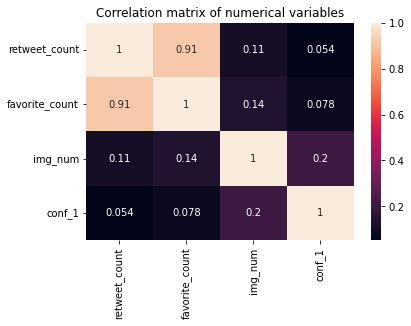

In [80]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of numerical variables")

From the above plot we can see the strong positive correlation between retweet_count and favorite_count.

Plotting a scatter plot of 'favorite_count' and 'retweet_count' to see if it also shows a positive correlation.

Text(0.5, 1.0, 'Relationship of favorite_count and retweet_count')

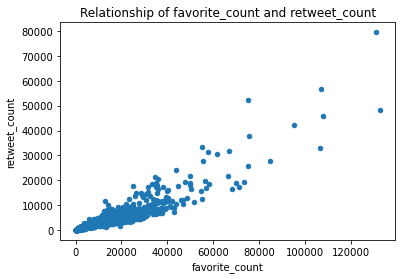

In [81]:
master.plot.scatter('favorite_count','retweet_count');
plt.title('Relationship of favorite_count and retweet_count')

The scatter plot above shows that `favorite_count` and `retweet_count` are positively correlated. They increase and decrease together.

In [82]:
master.stage.value_counts()

                     1668
pupper                201
doggo                  63
puppo                  22
doggo and pupper        8
floofer                 7
doggo and floofer       1
doggo and puppo         1
Name: stage, dtype: int64

From the output above we can tell that the common dog stages are 'pupper' followed by 'doggo'. so we can visualise the same using pie chart

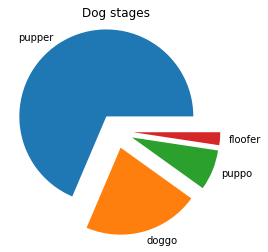

In [83]:
y = np.array([201, 63, 22, 7])
mylabels = ["pupper", "doggo", "puppo", "floofer"]
myexplode = [0.2, 0.2, 0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.title('Dog stages')
plt.show() 

A plot of bar chart to show the common dog breed according to the first prediction of the dog breed

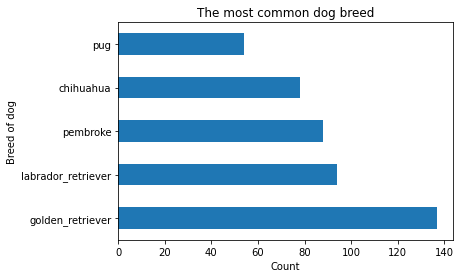

In [84]:
master['dog_1'].value_counts()[0:5].plot(kind = 'barh')
plt.title('The most common dog breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

The most common dog breed is golden_retriever

Since we have timestamp we can explore how the days of the week are related to the retweet_count. Are there days with considerably more retweets and others with less?

First we create a dataframe with the days of the week.

In [85]:
df_weekday = master.copy()

df_weekday['weekday'] = df_weekday['timestamp'].apply(lambda x: x.weekday())

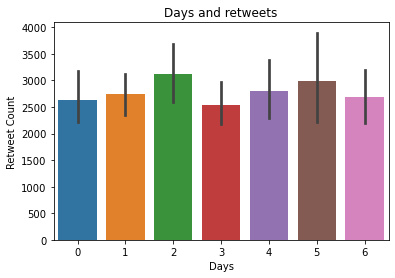

In [86]:
g=sns.barplot( x="weekday", y="retweet_count", data=df_weekday)
g.set_xlabel('Days')

# Setting the appropriate headers
plt.title('Days and retweets')
plt.ylabel('Retweet Count')

# Exporting the figure
fig =g.get_figure()
fig.savefig('days_and_retweets')

weekday() is a method  used to get the day of the week as a number and usually  Monday is 0 and Sunday is 6. With this  in mind we  have that Wednesday and Saturday had many retweet_counts.

<a id='isights'></a>
## Insights:

1.`favorite_count` and `retweet_count` are positively correlated

2.The dog stage'pupper' is the most common among the dogs

3.The most common dog breed is golden_retriever

4.Wednesday and Saturday had many retweet_counts.


<a id='conc'></a>
## Conclusion:
Data wrangling is a good practice since data can get dirty because of multiple reasons. My beginner mindset was to drop any rows with missing variable or impute. With data wrangling I have discovered that some quality and tidiness issues can be due to scrapping error or just extraction error. It is thus my responsibility to check for the issues and clean for them appropriately. Data wrangling can be time consuming and it is best to be strategic in that we clean for what is necessary. For instance if I wanted to use only three columns to do my analysis, then I can clean for them only.Sometimes we discover a tidiness or quality issue way after our assesment stage and this makes the process iterative.

<a id='limits'></a>
## Limitations

Challenging to uncover some data quality and tidyness issues.

Unclear course of action to take in some cases of data quality and tidyness issues. There are some issues that I was confident in the step I took to clean them. Other issues like 324 records missing in the `image_prediction` dataset I was unable to decide whether to drop them or generate a value for them. I was also unable to clean for double 'expanded_urls'.

My visualization skills are not yet top notch and thus I did shallow visualisations which I am hoping to be better in the future 
 
My preference was to get a developer account and scrap the `twitter_api` data myself. I was not able to do this due to some challanges while creating the developer account.

The methods I chose to clean the data may not be the best and that may lead to biased insights


<a id='referrence'></a>
## Referrence

1.https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/356d26d4-2237-46a0-ab78-e0ea93d9501a/lessons/ls2232/concepts/c32c5e23-8f28-45e1-8143-fb5ab20953e7

2.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

3.https://www.w3schools.com/python/python_regex.asp

4.https://rachelchen0104.medium.com/weratedogs-project-part-i-data-assessment-7bf5f59b0b5e

5.https://www.guru99.com/python-regular-expressions-complete-tutorial.html

6.https://www.kaggle.com/code/rihamrafat/we-rate-dogs-data-wrangling

7.https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe

8.https://github.com/meet3012/We-Rate-Dogs-Twitter-Archive-Data-Wrangling